
**Here is the code for the dissertation:**

The PHOENIX14T dataset can be downloaded from here: https://www-i6.informatik.rwth-aachen.de/~koller/RWTH-PHOENIX-2014-T/ 

The pre-processing of dataset using MediaPipe and creating a baseline transformer was done as a collaboration with my fellow classmate Rohan Kapoor under the supervision of Dr Vinay Namboodiri.

This notebook is for datapreprocessing and building the base transformer.
Please refer to another notebook for Linguistic analyses and fine-tuned models.

**Dataset pre-processing**

Dataset is stored in google drive. Here, we mount the drive to google colab notebook and then start pre-processing.

Using mediapipe, extracting pose estimation for all the frames/images present in a specified directory. 

A recursive function 'process_image_dataset' which processes all images and saves processed image to another directory. Also, displaying a sample processed image for verification.

Code Template Reference: <br>
[1] Google AI Pose Landmarker. Available at: https://ai.google.dev/edge/mediapipe/solutions/vision/pose_landmarker.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


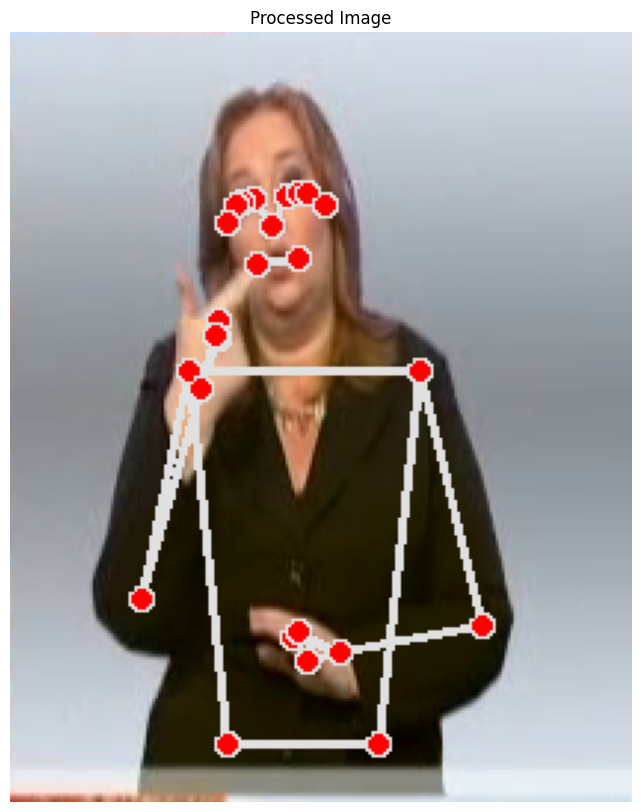

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os

# Initialising MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)
mp_drawing = mp.solutions.drawing_utils

# Processing each image to detect and draw pose landmarks
def process_image(image_path, save_dir=None):
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converting to RGB for MediaPipe
    results = pose.process(rgb_image)
    
    if results.pose_landmarks: # drawing pose
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    if save_dir:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        save_path = os.path.join(save_dir, os.path.basename(image_path))
        cv2.imwrite(save_path, image)
    return image

def display_image(image, title='Processed Image'): # sample processed image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def process_image_dataset(image_dir, save_dir): # recursive function for image processing as discussed in previous cell
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                image_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, image_dir)
                save_subdir = os.path.join(save_dir, relative_path)
                process_image(image_path, save_subdir)

image_dir = '/content/drive/My Drive/proj/train/train_31'
save_dir = f'/content/drive/My Drive/proj/processed_train/processed_train_31'
process_image_dataset(image_dir, save_dir)
processed_images = []
for root, dirs, files in os.walk(save_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            processed_images.append(os.path.join(root, file))
if processed_images:
    first_processed_image = cv2.imread(processed_images[0])
    display_image(first_processed_image)


Now, we extract these poses from the processed image and store it in NumPy array. These arrays are stored in NumPy files.

In [ ]:
import numpy as np

mp_pose = mp.solutions.pose # Pose Initialisation
pose = mp_pose.Pose(static_image_mode=True)

# reading image using OpenCV, converting it to RGB format, and processing with MediaPipe Pose to detect pose landmarks
def process_image(image_path, save_dir): 
    try:
        print(f"Processing image: {image_path}")
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {image_path}")
            return

        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(rgb_image)
        if results.pose_landmarks is None:
            print(f"No landmarks detected in image: {image_path}")
            return
# coordinates and visibility of the landmarks (x, y, z, visibility) are extracted
        landmarks = []
        for landmark in results.pose_landmarks.landmark:
            landmarks.append([landmark.x, landmark.y, landmark.z, landmark.visibility])

        landmarks = np.array(landmarks)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        save_path = os.path.join(save_dir, os.path.basename(image_path).replace('.jpg', '.npy').replace('.png', '.npy'))
        np.save(save_path, landmarks)
        print(f"Saved landmarks to: {save_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

def process_image_dataset(image_dir, save_dir): # Function processes images, iterating over all image files 
    print(f"Processing directory: {image_dir}")
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, image_dir)
                save_subdir = os.path.join(save_dir, relative_path)
                process_image(image_path, save_subdir)

image_dir = '/content/drive/My Drive/proj/processed_train/processed_train_31/'
save_dir = '/content/drive/My Drive/proj/processed_landmarks/'
process_image_dataset(image_dir, save_dir)

npy_path = None
for root, dirs, files in os.walk(save_dir): # saving pose landmarks as NumPy arrays (.npy file) 
    for file in files:
        if file.endswith('.npy'):
            npy_path = os.path.join(root, file)
            break
    if npy_path:
        break
    
if npy_path:
    print(f"Found NumPy file: {npy_path}")
    landmarks_array = np.load(npy_path)
    print(landmarks_array)
else:
    print("No NumPy files found in the specified directory.")


The output was too long so had to remove, here's a shorter text version of the output:



Streaming output truncated to the last 5000 lines.

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0064.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0064.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0070.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0070.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0113.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0113.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0043.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0043.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0065.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0065.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0104.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0104.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0082.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0082.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0094.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0094.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0107.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0107.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0080.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0080.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0098.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0098.npy

Processing image: /content/drive/My Drive/proj/processed_train/processed_train_31/31May_2011_Tuesday_tagesschau-4302/images0057.png

Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks/31May_2011_Tuesday_tagesschau-4302/images0057.npy

...
 [ 5.97747386e-01  1.78290296e+00  1.57530832e+00  2.71082367e-03]
 
 [ 2.87573934e-01  1.76607323e+00  1.68037498e+00  4.45857830e-03]
 
 [ 5.53890646e-01  1.84462047e+00  9.55971301e-01  1.05692190e-03]
 
 [ 3.41228664e-01  1.84680068e+00  1.03072727e+00  4.86400956e-03]]

Same process for development and test dataset

In [ ]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True) 

def process_image(image_path, save_dir):
    try:
        print(f"Processing image: {image_path}")
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {image_path}")
            return

        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(rgb_image)
        if results.pose_landmarks is None:
            print(f"No landmarks detected in image: {image_path}")
            return
        
        landmarks = []
        for landmark in results.pose_landmarks.landmark:
            landmarks.append([landmark.x, landmark.y, landmark.z, landmark.visibility])

        landmarks = np.array(landmarks)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        save_path = os.path.join(save_dir, os.path.basename(image_path).replace('.jpg', '.npy').replace('.png', '.npy'))
        np.save(save_path, landmarks)
        print(f"Saved landmarks to: {save_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

def process_image_dataset(image_dir, save_dir):
    print(f"Processing directory: {image_dir}")
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, image_dir)
                save_subdir = os.path.join(save_dir, relative_path)
                process_image(image_path, save_subdir)

image_dir = '/content/drive/My Drive/proj/dev/'
save_dir = '/content/drive/My Drive/proj/processed_landmarks_dev/'


process_image_dataset(image_dir, save_dir)
npy_path = None
for root, dirs, files in os.walk(save_dir):
    for file in files:
        if file.endswith('.npy'):
            npy_path = os.path.join(root, file)
            break
    if npy_path:
        break
    
if npy_path:
    print(f"Found NumPy file: {npy_path}")
    landmarks_array = np.load(npy_path)
    print(landmarks_array)
else:
    print("No NumPy files found in the specified directory.")

The output was too long so had to remove, here's a shorter text version of the output:

Streaming output truncated to the last 5000 lines.

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0023.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0023.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0029.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0029.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0027.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0027.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0030.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0030.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0028.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0028.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0035.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0035.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0034.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0034.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0031.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0031.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0036.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0036.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0033.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0033.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0037.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0037.npy

Processing image: /content/drive/My Drive/proj/dev/06October_2010_Wednesday_tagesschau-632/images0032.png
Saved landmarks to: /content/drive/My Drive/proj/processed_landmarks_dev/06October_2010_Wednesday_tagesschau-632/images0032.npy

...
 [ 6.59802377e-01  1.70634723e+00  9.46147680e-01  2.11238489e-03]
 
 [ 3.79690558e-01  1.69996870e+00  1.33428466e+00  4.44426155e-03]
 
 [ 5.64805388e-01  1.76504219e+00  4.42529827e-01  6.84348051e-04]
 
 [ 3.60593021e-01  1.74998760e+00  8.14848125e-01  1.95694715e-03]]

Additional Note: 

The pre-processing code is a little repetitive as we had to upload and process the data in batches and on different machines due to computational constraint. The output shows the last processed batch.

Dataset's file structure and data description:

In [ ]:
import pandas as pd
labels_file = '/content/drive/MyDrive/proj/annotations/manual/PHOENIX-2014-T.train.corpus.csv'
labels_df = pd.read_csv(labels_file, delimiter='|')
labels_df = labels_df[['name', 'translation']]
labels_df.columns = ['file_name', 'text']
print(labels_df.head())


                              file_name  \
0  11August_2010_Wednesday_tagesschau-1   
1  11August_2010_Wednesday_tagesschau-4   
2  11August_2010_Wednesday_tagesschau-5   
3  11August_2010_Wednesday_tagesschau-6   
4  11August_2010_Wednesday_tagesschau-7   

                                                text  
0  und nun die wettervorhersage für morgen donner...  
1  mancherorts regnet es auch länger und ergiebig...  
2  im nordwesten bleibt es heute nacht meist troc...  
3  auch am tag gibt es verbreitet zum teil kräfti...  
4  größere wolkenlücken finden sich vor allem im ...  


In [ ]:
def extract_folder_names(landmarks_dir):
    folder_names = [name for name in os.listdir(landmarks_dir) if os.path.isdir(os.path.join(landmarks_dir, name))]
    return folder_names
landmarks_dir = '/content/drive/My Drive/proj/landmark_sample/'
folder_names = extract_folder_names(landmarks_dir)
print(f"Sample folder names from landmarks directory: {folder_names[:5]}")

Sample folder names from landmarks directory: ['18February_2011_Friday_tagesschau-6830', '18February_2010_Thursday_tagesschau-4520', '18February_2010_Thursday_tagesschau-4523', '18February_2010_Thursday_tagesschau-4525', '18February_2011_Friday_tagesschau-6831']


So next set of code, we will have file check to verify if files are processed and loaded. If not, the code will perform that function. For this parallel processing and file caching has been used for efficiency and to avoid reprocessing files.

Once all the data has been processed, the sequences (landmark data) and texts are saved to .npy and .json files, respectively, for future use.

Again, this is done as files were processed in batches and on different machines so this step compiles all the data.

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import json
from google.colab import drive
drive.mount('/content/drive')

def extract_file_names_from_csv(labels_file): # extracting text annotations
    labels_df = pd.read_csv(labels_file, delimiter='|')
    labels_df = labels_df[['name', 'translation']]
    labels_df.columns = ['file_name', 'text']
    file_name_dict = {row['file_name']: row['text'] for index, row in labels_df.iterrows()}
    return file_name_dict

def extract_folder_names(landmarks_dir): # extracting landmark filenames
    folder_names = [name for name in os.listdir(landmarks_dir) if os.path.isdir(os.path.join(landmarks_dir, name))]
    return folder_names

def process_folder(folder_name, file_name_dict, landmarks_dir): # matching NumPy arrays with the corresponding texts from csv files
    sequences = []
    texts = []
    if folder_name in file_name_dict:
        folder_path = os.path.join(landmarks_dir, folder_name)
        npy_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]
        for npy_file_path in npy_files:
            try:
                landmarks = np.load(npy_file_path)
                sequences.append(landmarks)
                texts.append(file_name_dict[folder_name])
            except Exception as e:
                print(f"Error loading {npy_file_path}: {e}")
    return sequences, texts

def load_data_from_folders_parallel(file_name_dict, folder_names, landmarks_dir, cache_file, sequences_file, texts_file): # parallel processing and caching as mentioned in previous cell
    sequences = []
    texts = []
    found_count = 0
    not_found_count = 0
    if os.path.exists(cache_file):
        with open(cache_file, 'r') as f:
            processed_files = json.load(f)
    else:
        processed_files = {}
    new_processed_files = {}

    if os.path.exists(sequences_file) and os.path.exists(texts_file):
        sequences = np.load(sequences_file, allow_pickle=True).tolist()
        with open(texts_file, 'r') as f:
            texts = json.load(f)

    with ThreadPoolExecutor(max_workers=8) as executor:
        futures = {executor.submit(process_folder, folder_name, file_name_dict, landmarks_dir): folder_name for folder_name in folder_names if folder_name not in processed_files}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Processing folders"):
            result_sequences, result_texts = future.result()
            if result_sequences:
                folder_name = futures[future]
                new_processed_files[folder_name] = True
                sequences.extend(result_sequences)
                texts.extend(result_texts)
                found_count += 1
            else:
                not_found_count += 1
                
    processed_files.update(new_processed_files)
    with open(cache_file, 'w') as f:
        json.dump(processed_files, f)

    np.save(sequences_file, np.array(sequences, dtype=object))
    with open(texts_file, 'w') as f:
        json.dump(texts, f)

    print(f"Number of files with landmarks: {found_count}")
    print(f"Number of files without landmarks: {not_found_count}")
    return np.array(sequences), texts

labels_file = '/content/drive/MyDrive/proj/annotations/manual/PHOENIX-2014-T.train.corpus.csv'
landmarks_dir = '/content/drive/My Drive/proj/processed_landmarks/'
cache_file = '/content/drive/My Drive/proj/processed_landmarks_cache.json'
sequences_file = '/content/drive/My Drive/proj/sequences.npy'
texts_file = '/content/drive/My Drive/proj/texts.json'

file_name_dict = extract_file_names_from_csv(labels_file)
folder_names = extract_folder_names(landmarks_dir)
sequences, texts = load_data_from_folders_parallel(file_name_dict, folder_names, landmarks_dir, cache_file, sequences_file, texts_file)
np.save(sequences_file, np.array(sequences, dtype=object))

with open(texts_file, 'w') as f:
    json.dump(texts, f)
print("Sequences and texts have been saved to disk.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing folders: 100%|██████████| 1058/1058 [07:59<00:00,  2.21it/s]


Number of files with landmarks: 1058
Number of files without landmarks: 0
Sequences and texts have been saved to disk.


Same process for dev and test dataset.

In [ ]:
def extract_file_names_from_csv(labels_file):
    labels_df = pd.read_csv(labels_file, delimiter='|')
    labels_df = labels_df[['name', 'translation']]
    labels_df.columns = ['file_name', 'text']
    file_name_dict = {row['file_name']: row['text'] for index, row in labels_df.iterrows()}
    return file_name_dict

def extract_folder_names(landmarks_dir):
    folder_names = [name for name in os.listdir(landmarks_dir) if os.path.isdir(os.path.join(landmarks_dir, name))]
    return folder_names

def process_folder(folder_name, file_name_dict, landmarks_dir):
    sequences = []
    texts = []
    if folder_name in file_name_dict:
        folder_path = os.path.join(landmarks_dir, folder_name)
        npy_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]
        for npy_file_path in npy_files:
            try:
                landmarks = np.load(npy_file_path)
                sequences.append(landmarks)
                texts.append(file_name_dict[folder_name])
            except Exception as e:
                print(f"Error loading {npy_file_path}: {e}")
    return sequences, texts

def load_data_from_folders_parallel(file_name_dict, folder_names, landmarks_dir, cache_file, sequences_file, texts_file):
    sequences = []
    texts = []
    found_count = 0
    not_found_count = 0
    if os.path.exists(cache_file):
        with open(cache_file, 'r') as f:
            processed_files = json.load(f)
    else:
        processed_files = {}
    new_processed_files = {}

    if os.path.exists(sequences_file) and os.path.exists(texts_file):
        sequences = np.load(sequences_file, allow_pickle=True).tolist()
        with open(texts_file, 'r') as f:
            texts = json.load(f)

    with ThreadPoolExecutor(max_workers=8) as executor:
        futures = {executor.submit(process_folder, folder_name, file_name_dict, landmarks_dir): folder_name for folder_name in folder_names if folder_name not in processed_files}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Processing folders"):
            result_sequences, result_texts = future.result()
            if result_sequences:
                folder_name = futures[future]
                new_processed_files[folder_name] = True
                sequences.extend(result_sequences)
                texts.extend(result_texts)
                found_count += 1
            else:
                not_found_count += 1

    processed_files.update(new_processed_files)
    with open(cache_file, 'w') as f:
        json.dump(processed_files, f)

    np.save(sequences_file, np.array(sequences, dtype=object))
    with open(texts_file, 'w') as f:
        json.dump(texts, f)
    print(f"Number of files with landmarks: {found_count}")
    print(f"Number of files without landmarks: {not_found_count}")
    return np.array(sequences), texts

labels_file = '/content/drive/MyDrive/proj/annotations/manual/PHOENIX-2014-T.test.corpus.csv'
landmarks_dir = '/content/drive/My Drive/proj/processed_landmarks_test/'
cache_file = '/content/drive/My Drive/proj/processed_landmarks_test_cache.json'
sequences_file = '/content/drive/My Drive/proj/sequences_test.npy'
texts_file = '/content/drive/My Drive/proj/texts_test.json'
file_name_dict = extract_file_names_from_csv(labels_file)
folder_names = extract_folder_names(landmarks_dir)
sequences, texts = load_data_from_folders_parallel(file_name_dict, folder_names, landmarks_dir, cache_file, sequences_file, texts_file)
np.save(sequences_file, np.array(sequences, dtype=object))
with open(texts_file, 'w') as f:
    json.dump(texts, f)
print("Sequences and texts have been saved to disk.")

Processing folders: 100%|██████████| 304/304 [26:34<00:00,  5.24s/it]


Number of files with landmarks: 304
Number of files without landmarks: 0
Sequences and texts have been saved to disk.


In [ ]:
def extract_file_names_from_csv(labels_file):
    labels_df = pd.read_csv(labels_file, delimiter='|')
    labels_df = labels_df[['name', 'translation']]
    labels_df.columns = ['file_name', 'text']
    file_name_dict = {row['file_name']: row['text'] for index, row in labels_df.iterrows()}
    return file_name_dict

def extract_folder_names(landmarks_dir):
    folder_names = [name for name in os.listdir(landmarks_dir) if os.path.isdir(os.path.join(landmarks_dir, name))]
    return folder_names

def process_folder(folder_name, file_name_dict, landmarks_dir):
    sequences = []
    texts = []
    if folder_name in file_name_dict:
        folder_path = os.path.join(landmarks_dir, folder_name)
        npy_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]
        for npy_file_path in npy_files:
            try:
                landmarks = np.load(npy_file_path)
                sequences.append(landmarks)
                texts.append(file_name_dict[folder_name])
            except Exception as e:
                print(f"Error loading {npy_file_path}: {e}")
    return sequences, texts

def load_data_from_folders_parallel(file_name_dict, folder_names, landmarks_dir, cache_file, sequences_file, texts_file):
    sequences = []
    texts = []
    found_count = 0
    not_found_count = 0
    if os.path.exists(cache_file):
        with open(cache_file, 'r') as f:
            processed_files = json.load(f)
    else:
        processed_files = {}
    new_processed_files = {}

    if os.path.exists(sequences_file) and os.path.exists(texts_file):
        sequences = np.load(sequences_file, allow_pickle=True).tolist()
        with open(texts_file, 'r') as f:
            texts = json.load(f)

    with ThreadPoolExecutor(max_workers=8) as executor:
        futures = {executor.submit(process_folder, folder_name, file_name_dict, landmarks_dir): folder_name for folder_name in folder_names if folder_name not in processed_files}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Processing folders"):
            result_sequences, result_texts = future.result()
            if result_sequences:
                folder_name = futures[future]
                new_processed_files[folder_name] = True
                sequences.extend(result_sequences)
                texts.extend(result_texts)
                found_count += 1
            else:
                not_found_count += 1
                
    processed_files.update(new_processed_files)
    with open(cache_file, 'w') as f:
        json.dump(processed_files, f)

    np.save(sequences_file, np.array(sequences, dtype=object))
    with open(texts_file, 'w') as f:
        json.dump(texts, f)

    print(f"Number of files with landmarks: {found_count}")
    print(f"Number of files without landmarks: {not_found_count}")
    return np.array(sequences), texts

labels_file = '/content/drive/MyDrive/proj/annotations/manual/PHOENIX-2014-T.dev.corpus.csv'
landmarks_dir = '/content/drive/My Drive/proj/processed_landmarks_dev/'
cache_file = '/content/drive/My Drive/proj/processed_landmarks_dev_cache.json'
sequences_file = '/content/drive/My Drive/proj/sequences_dev.npy'
texts_file = '/content/drive/My Drive/proj/texts_dev.json'

file_name_dict = extract_file_names_from_csv(labels_file)
folder_names = extract_folder_names(landmarks_dir)
sequences, texts = load_data_from_folders_parallel(file_name_dict, folder_names, landmarks_dir, cache_file, sequences_file, texts_file)
np.save(sequences_file, np.array(sequences, dtype=object))
with open(texts_file, 'w') as f:
    json.dump(texts, f)
print("Sequences and texts have been saved to disk.")

Processing folders: 100%|██████████| 294/294 [19:06<00:00,  3.90s/it]


Number of files with landmarks: 294
Number of files without landmarks: 0
Sequences and texts have been saved to disk.


**Transfomer building**

Steps:
- For transformer, we've transformer and positional encoding class. It includes Transformer-based sequence-to-sequence model and adding positional information to the input embeddings.

- Transformer model will initialise with specified input dimensions, embedding dimensions, number of attention heads, layers, and output dimensions.

- Tokenisation function splits the text or tokens into words and converts each word to its corresponding index in the vocabulary. 

- Using build_vocab, we build vocabulary dictionary from lists of text.

- Landmarks Dataset builds custom dataset class for sequence and text data.

- collate_fn is added for batching, padding and maintaining dimensions.

- Lastly, load_full_data and train_and_evaluate to load sequences and corresponding text labels from files and training & evaluation.



Next, we evaluate the trained model using various metrics.

decode_text converts output index to readable text using vocab dictionary created before. This is done by mapping each index to corresponding word in the vocabulary and concatenate them into a sentence.

Then, evaluation is done using various metrcis to see the model's performance. It's evaluated on two separate datasets: dev/validation and test sets.



**Base Transformer:** 1 Layer, 4 Heads, Input 1024, Embed 512


TransformerModel(
  (embedding): Linear(in_features=1024, out_features=512, bias=True)
  (target_embedding): Embedding(1987, 512)
  (positional_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=512, bias=True)
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): Layer

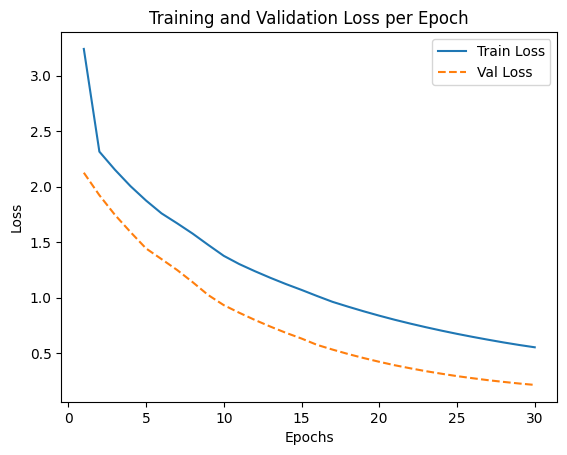

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import numpy as np
import json
import math
import time
from torch.cuda.amp import GradScaler, autocast
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class PositionalEncoding(nn.Module): # initialising positional encoding
    def __init__(self, embed_dim, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=0.1)
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-math.log(10000.0) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x): # adding positional encoding to input
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerModel(nn.Module):
    # initialising transformer model with the specified configuration
    def __init__(self, input_dim, embed_dim, num_heads, num_layers, output_dim):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.target_embedding = nn.Embedding(output_dim, embed_dim)
        self.positional_encoding = PositionalEncoding(embed_dim)
        self.transformer = nn.Transformer(
            d_model=embed_dim,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dim_feedforward=2048,
            dropout=0.1,
            activation='relu',
            batch_first=True
        )
        self.layer_norm = nn.LayerNorm(embed_dim)
        self.fc_out = nn.Linear(embed_dim, output_dim)
        self.dropout = nn.Dropout(0.1)
        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.embedding.weight)
        nn.init.xavier_uniform_(self.target_embedding.weight)
        nn.init.xavier_uniform_(self.fc_out.weight)
        for p in self.transformer.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def forward(self, src, tgt):
        # forward pass of the model including embedding, positional encoding and generating output prediction
        src = self.embedding(src.float())
        tgt = self.target_embedding(tgt.long())
        src = self.positional_encoding(self.layer_norm(self.dropout(src)))
        tgt = self.positional_encoding(self.layer_norm(self.dropout(tgt)))
        output = self.transformer(src, tgt)
        output = self.fc_out(output)
        return output

def word_tokenizer(text, vocab): # applying word tokenisation 
    return [vocab[word] for word in text.split() if word in vocab]

def build_vocab(texts):
    # assigning each word with an index, adding <pad> token for padding sequence
    words = set()
    for text in texts:
        words.update(text.split())
    vocab = {word: idx for idx, word in enumerate(sorted(words))}
    vocab['<pad>'] = len(vocab)
    return vocab

class LandmarksDataset(Dataset):
    # dataset class for handling sequences and text data
    def __init__(self, sequences, texts, tokenizer):
        self.sequences = sequences
        self.texts = texts
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence = torch.tensor(self.sequences[idx], dtype=torch.float32)
        text = self.texts[idx]
        text_tokens = torch.tensor(self.tokenizer(text), dtype=torch.long)
        return sequence, text_tokens

def collate_fn(batch, pad_idx, input_dim):
    # padding sequences and texts to maintain same dimension
    sequences, texts = zip(*batch)
    sequences_padded = torch.nn.utils.rnn.pad_sequence(sequences, batch_first=True, padding_value=0)
    texts_padded = torch.nn.utils.rnn.pad_sequence(texts, batch_first=True, padding_value=pad_idx)
    if sequences_padded.size(2) != input_dim:
        pad_size = input_dim - sequences_padded.size(2)
        sequences_padded = torch.nn.functional.pad(sequences_padded, (0, pad_size))
    return sequences_padded, texts_padded

def load_full_data(sequence_file, text_file): 
    # reading data from NumPy files and JSON file to load sequence and text labels
    with open(sequence_file, 'rb') as sf, open(text_file, 'r') as tf:
        sequences = np.load(sf, allow_pickle=True).tolist()
        texts = json.load(tf)
    return sequences, texts

sequences, texts = load_full_data('/content/drive/My Drive/proj/sequences.npy', '/content/drive/My Drive/proj/texts.json')
vocab = build_vocab(texts)
pad_idx = vocab['<pad>']

# Updating configuration for 2nd transformer
INPUT_DIM = 1024 
EMBED_DIM = 512
NUM_HEADS = 4
NUM_LAYERS = 1
OUTPUT_DIM = len(vocab)
BATCH_SIZE = 64

dataset = LandmarksDataset(sequences, texts, lambda text: word_tokenizer(text, vocab))
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=lambda x: collate_fn(x, pad_idx, INPUT_DIM), num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=lambda x: collate_fn(x, pad_idx, INPUT_DIM), num_workers=2, pin_memory=True)
num_epochs = 30
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_and_evaluate(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs, device, input_dim):
    # training the model and evaluation
    train_losses = []
    val_losses = []
    scaler = GradScaler()

    for epoch in range(num_epochs):
        start_time = time.time()
        model.train()
        train_loss = 0.0
        for sequences, texts in train_loader:
            sequences, texts = sequences.to(device), texts.to(device)
            optimizer.zero_grad()

            with autocast():
                outputs = model(sequences, texts[:, :-1])
                loss = criterion(outputs.view(-1, OUTPUT_DIM), texts[:, 1:].reshape(-1))

            scaler.scale(loss).backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer)
            scaler.update()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for sequences, texts in val_loader:
                sequences, texts = sequences.to(device), texts.to(device)
                with autocast():
                    outputs = model(sequences, texts[:, :-1])
                    loss = criterion(outputs.view(-1, OUTPUT_DIM), texts[:, 1:].reshape(-1))
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        scheduler.step()

        end_time = time.time()
        epoch_time = end_time - start_time

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Epoch Time: {epoch_time:.2f}s")

    return train_losses, val_losses

model = TransformerModel(INPUT_DIM, EMBED_DIM, NUM_HEADS, NUM_LAYERS, OUTPUT_DIM).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=learning_rate, steps_per_epoch=len(train_loader), epochs=num_epochs)
print(model) 
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total trainable parameters: {total_params}')
train_losses, val_losses = train_and_evaluate(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs, device, INPUT_DIM)

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.show()
torch.save(model.state_dict(), '/content/drive/My Drive/proj/transformer_1Layer_4Head.pth')

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import json
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import precision_score, recall_score, f1_score
from nltk.metrics import edit_distance
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
nltk.download('punkt')

def decode_text(output, vocab):
    # map each index in output to corresponding word in the vocabulary
    inv_vocab = {v: k for k, v in vocab.items()}
    decoded_texts = []
    for seq in output:
        decoded_text = ' '.join([inv_vocab[token] for token in seq if token in inv_vocab and inv_vocab[token] != '<pad>'])
        decoded_texts.append(decoded_text)
    return decoded_texts

def evaluate_and_metrics(model, loader, device, vocab, pad_idx):
    model.eval()
    total_loss = 0.0
    criterion = nn.CrossEntropyLoss(ignore_index=pad_idx) # Loss function: Cross Entropy Loss
    correct_predictions = 0
    total_predictions = 0
    all_predicted_tokens = []
    all_target_tokens = []
    sequence_matches = 0
    total_sequences = 0
    total_edit_distance = 0
    references = []
    hypotheses = []

    with torch.no_grad():
        for batch_idx, (sequences, texts) in enumerate(loader):
            sequences, texts = sequences.to(device), texts.to(device)
            
            # processing sequence to generate predictions
            outputs = model(sequences, texts[:, :-1])
            loss = criterion(outputs.view(-1, outputs.size(-1)), texts[:, 1:].reshape(-1)) # loss calculation
            total_loss += loss.item()

            predicted_tokens = outputs.argmax(dim=-1) # token prediction
            all_predicted_tokens.extend(predicted_tokens.cpu().numpy().flatten())
            all_target_tokens.extend(texts[:, 1:].cpu().numpy().flatten())

            correct_predictions += (predicted_tokens == texts[:, 1:]).sum().item()
            total_predictions += texts[:, 1:].ne(pad_idx).sum().item()

            for pred_seq, tgt_seq in zip(predicted_tokens.cpu().numpy(), texts[:, 1:].cpu().numpy()):
                total_sequences += 1
                if np.array_equal(pred_seq, tgt_seq):
                    sequence_matches += 1
                total_edit_distance += edit_distance(pred_seq.tolist(), tgt_seq.tolist())
                
                # decoding for calculating BLEU score
                references.append(decode_text([tgt_seq], vocab))
                hypotheses.append(decode_text([pred_seq], vocab))

    avg_loss = total_loss / len(loader)
    token_accuracy = correct_predictions / total_predictions #Token Accuracy
    sequence_accuracy = sequence_matches / total_sequences #Sequence Accuracy
    avg_edit_distance = total_edit_distance / total_sequences #Edit distance
    precision = precision_score(all_target_tokens, all_predicted_tokens, average='macro', zero_division=0)
    recall = recall_score(all_target_tokens, all_predicted_tokens, average='macro', zero_division=0)
    f1 = f1_score(all_target_tokens, all_predicted_tokens, average='macro', zero_division=0)

    # Calculating BLEU scores 
    smoothing = SmoothingFunction().method4
    bleu_scores = { "BLEU-1": [], "BLEU-2": [], "BLEU-3": [], "BLEU-4": [] }
    for ref, hyp in zip(references, hypotheses):
        ref_tokens = nltk.word_tokenize(ref[0])
        hyp_tokens = nltk.word_tokenize(hyp[0])
        bleu_scores["BLEU-1"].append(sentence_bleu([ref_tokens], hyp_tokens, weights=(1, 0, 0, 0), smoothing_function=smoothing))
        bleu_scores["BLEU-2"].append(sentence_bleu([ref_tokens], hyp_tokens, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing))
        bleu_scores["BLEU-3"].append(sentence_bleu([ref_tokens], hyp_tokens, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smoothing))
        bleu_scores["BLEU-4"].append(sentence_bleu([ref_tokens], hyp_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothing))

    avg_bleu_scores = { key: np.mean(value) for key, value in bleu_scores.items() }
    
    # Calculating ROUGE scores
    rouge_scorer_inst = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = { "ROUGE-1": [], "ROUGE-2": [], "ROUGE-L": [] }
    for ref, hyp in zip(references, hypotheses):
        score = rouge_scorer_inst.score(ref[0], hyp[0])
        rouge_scores["ROUGE-1"].append(score['rouge1'].fmeasure)
        rouge_scores["ROUGE-2"].append(score['rouge2'].fmeasure)
        rouge_scores["ROUGE-L"].append(score['rougeL'].fmeasure)
    avg_rouge_scores = { key: np.mean(value) for key, value in rouge_scores.items() }
    return avg_loss, token_accuracy, sequence_accuracy, avg_edit_distance, precision, recall, f1, avg_bleu_scores, avg_rouge_scores

# Loading sequences and corresponding text for dev and test dataset
dev_sequences, dev_texts = load_full_data('/content/drive/My Drive/proj/sequences_dev.npy', '/content/drive/My Drive/proj/texts_dev.json')
test_sequences, test_texts = load_full_data('/content/drive/My Drive/proj/sequences_test.npy', '/content/drive/My Drive/proj/texts_test.json')
dev_dataset = LandmarksDataset(dev_sequences, dev_texts, lambda text: word_tokenizer(text, vocab))
test_dataset = LandmarksDataset(test_sequences, test_texts, lambda text: word_tokenizer(text, vocab))
dev_loader = DataLoader(dev_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=lambda x: collate_fn(x, pad_idx, INPUT_DIM), num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=lambda x: collate_fn(x, pad_idx, INPUT_DIM), num_workers=2, pin_memory=True)

# Model Loading
model = TransformerModel(INPUT_DIM, EMBED_DIM, NUM_HEADS, NUM_LAYERS, OUTPUT_DIM).to(device)
model.load_state_dict(torch.load('/content/drive/My Drive/proj/transformer_1Layer_4Head.pth'))
model.eval()

eval_loss, eval_token_accuracy, eval_sequence_accuracy, eval_avg_edit_distance, eval_precision, eval_recall, eval_f1, eval_bleu_scores, eval_rouge_scores = evaluate_and_metrics(model, dev_loader, device, vocab, pad_idx)
print(f"Validation Loss: {eval_loss:.4f}")
print(f"Validation Token Accuracy: {eval_token_accuracy:.4f}")
print(f"Validation Sequence Accuracy: {eval_sequence_accuracy:.4f}")
print(f"Validation Avg Edit Distance: {eval_avg_edit_distance:.4f}")
print(f"Validation Precision: {eval_precision:.4f}")
print(f"Validation Recall: {eval_recall:.4f}")
print(f"Validation F1-Score: {eval_f1:.4f}")
for key, value in eval_bleu_scores.items():
    print(f"Average Validation {key}: {value:.4f}")
for key, value in eval_rouge_scores.items():
    print(f"Average Validation {key}: {value:.4f}")

test_loss, test_token_accuracy, test_sequence_accuracy, test_avg_edit_distance, test_precision, test_recall, test_f1, test_bleu_scores, test_rouge_scores = evaluate_and_metrics(model, test_loader, device, vocab, pad_idx)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Token Accuracy: {test_token_accuracy:.4f}")
print(f"Test Sequence Accuracy: {test_sequence_accuracy:.4f}")
print(f"Test Avg Edit Distance: {test_avg_edit_distance:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
for key, value in test_bleu_scores.items():
    print(f"Average Test {key}: {value:.4f}")
for key, value in test_rouge_scores.items():
    print(f"Average Test {key}: {value:.4f}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Validation Loss: 3.1565
Validation Token Accuracy: 0.4902
Validation Sequence Accuracy: 0.0079
Validation Avg Edit Distance: 8.5323
Validation Precision: 0.3030
Validation Recall: 0.3050
Validation F1-Score: 0.2863
Average Validation BLEU-1: 0.6123
Average Validation BLEU-2: 0.3974
Average Validation BLEU-3: 0.2915
Average Validation BLEU-4: 0.2224
Average Validation ROUGE-1: 0.6352
Average Validation ROUGE-2: 0.3230
Average Validation ROUGE-L: 0.5298
Test Loss: 3.0029
Test Token Accuracy: 0.5288
Test Sequence Accuracy: 0.0136
Test Avg Edit Distance: 7.5362
Test Precision: 0.3368
Test Recall: 0.3440
Test F1-Score: 0.3216
Average Test BLEU-1: 0.6144
Average Test BLEU-2: 0.4199
Average Test BLEU-3: 0.3148
Average Test BLEU-4: 0.2429
Average Test ROUGE-1: 0.6449
Average Test ROUGE-2: 0.3580
Average Test ROUGE-L: 0.5516
